In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt



anos_list = list(range(2005, 2019))

anos_lista = []
valor_contratos_lista = []
idade_media_lista = []

for ano_list in anos_list:
    url = 'https://www.transfermarkt.com/flamengo-rio-de-janeiro/transfers/verein/614/saison_id/'+ str(ano_list) + ''
    page = requests.get(url, headers={'User-Agent': 'Custom5'})
    soup = BeautifulSoup(page.text, 'html.parser')
    

    tag_list = soup.tfoot.find_all('td')
    valor = (tag_list[0].text)
    
    idade = (tag_list[1].text)
        
    valor_contratos_lista.append(valor)
    idade_media_lista.append(idade)
    anos_lista.append(ano_list) 




In [50]:
#print(valor_contratos_lista)
#print(idade_media_lista)
#print(anos_lista)

In [2]:
flamengo_df = pd.DataFrame({'Ano': anos_lista,
         'Despesa com contratações': valor_contratos_lista,
                        'Média de idade': idade_media_lista
                       })

flamengo_df

,Ano,Despesa com contratações,Média de idade
0,2005,"Sum: 2,00 Mill. €","Average age of arrivals: 22,0"
1,2006,"Sum: 4,50 Mill. €","Average age of arrivals: 23,9"
2,2007,"Sum: 2,85 Mill. €","Average age of arrivals: 22,8"
3,2008,"Sum: 1,87 Mill. €","Average age of arrivals: 22,9"
4,2009,Sum: 350 Th. €,"Average age of arrivals: 23,4"
5,2010,"Sum: 5,93 Mill. €","Average age of arrivals: 23,2"
6,2011,"Sum: 14,69 Mill. €","Average age of arrivals: 23,0"
7,2012,"Sum: 3,50 Mill. €","Average age of arrivals: 24,1"
8,2013,"Sum: 3,12 Mill. €","Average age of arrivals: 24,2"
9,2014,"Sum: 5,43 Mill. €","Average age of arrivals: 24,2"


In [9]:
#limpeza do dataframe

#substituições na segunda coluna
limpeza1 = {'Sum: ': '',
     ' Mill. €': '',
     'Th. €': '',
    'Average age of arrivals: ': '',
          '350': '0,35',
           ',': '.'}

#substituições na terceira coluna
limpeza2 = {'Average age of arrivals: ': ''}


#aplicando as substituições em cada coluna
#flamengo_df['Despesa com contratações'] = flamengo_df['Despesa com contratações'].replace(limpeza1, regex=True)
#flamengo_df['Média de idade'] = flamengo_df['Média de idade'].replace(limpeza2, regex=True)

#aplicando as substituições no dataframe de uma vez
flamengo_df = flamengo_df.replace(limpeza2, regex=True).replace(limpeza1, regex=True)

In [10]:
flamengo_df

,Ano,Despesa com contratações,Média de idade
0,2005,2.00,22.0
1,2006,4.50,23.9
2,2007,2.85,22.8
3,2008,1.87,22.9
4,2009,0.35,23.4
5,2010,5.93,23.2
6,2011,14.69,23.0
7,2012,3.50,24.1
8,2013,3.12,24.2
9,2014,5.43,24.2


In [13]:
#transformar as colunas em floats
flamengo_df['Despesa com contratações'] = pd.to_numeric(flamengo_df['Despesa com contratações'])
flamengo_df['Média de idade'] = pd.to_numeric(flamengo_df['Média de idade'])

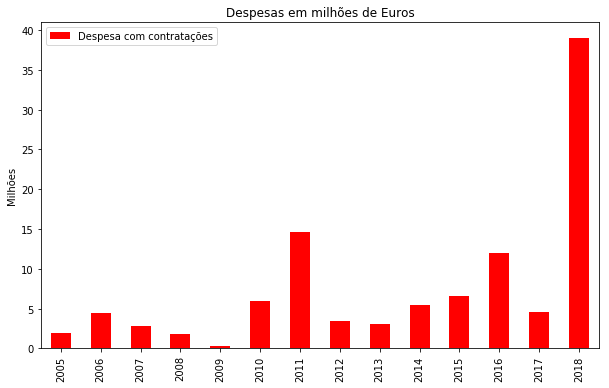

In [32]:
#define o tamanho do gráfico a ser exibido na tela
plt.rcParams['figure.figsize'] = (10,6)


flamengo_df.plot('Ano', 'Despesa com contratações', kind='bar', color='red')

#título do gráfico
plt.title('Despesas em milhões de Euros')

#definindo nome do eixo X
plt.xlabel('') 
plt.ylabel('Milhões') #definindo nome do eixo Y
plt.legend(loc='best') #colocando a legenda no melhor lugar

plt.show()



Text(0.5, 0, '')

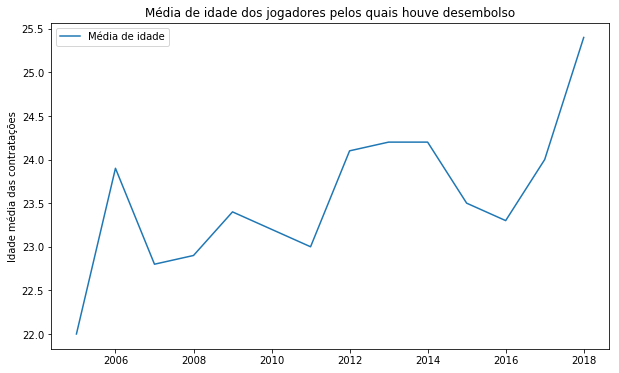

In [37]:
flamengo_df.plot('Ano', 'Média de idade', kind='line')

plt.title('Média de idade dos jogadores pelos quais houve desembolso')
plt.ylabel('Idade média das contratações')
plt.xlabel('')